# Mall Customer Segmentation

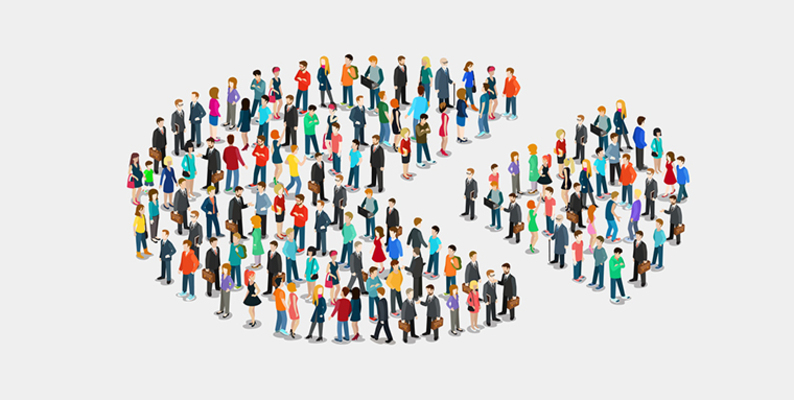

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data

df = pd.read_csv('MallCustomers_Data_Project.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Lets check the shape of the dataset

df.shape

(200, 5)

<b>The dataset consists of 200 rows and 5 columns.</b>

In [4]:
# Dropping the unnecesssary feature 'CustomerID'

df = df.drop(['CustomerID'],axis=1)

In [5]:
# Lets check the shape of the dataset again

df.shape

(200, 4)

<b>As we can see, our dataset now consists of 200 rows and 4 columns.</b>

In [6]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [7]:
# Lets check the datatypes of the columns

df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
# Statistical summary of the dataset

df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
# Dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [10]:
# Lets check for null values

df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<b>As we can see, there are no null values in the dataset.</b>

In [11]:
# Get value counts of all columns

for col in df.columns:
    value_counts = df[col].value_counts()
    print(f"Value counts for column '{col}':\n{value_counts}\n")

Value counts for column 'Gender':
Female    112
Male       88
Name: Gender, dtype: int64

Value counts for column 'Age':
32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

Value counts for column 'Annual Income (k$)':
54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

Value counts for column 'Spending Score (1-100)':
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: 

# EDA - Visualization

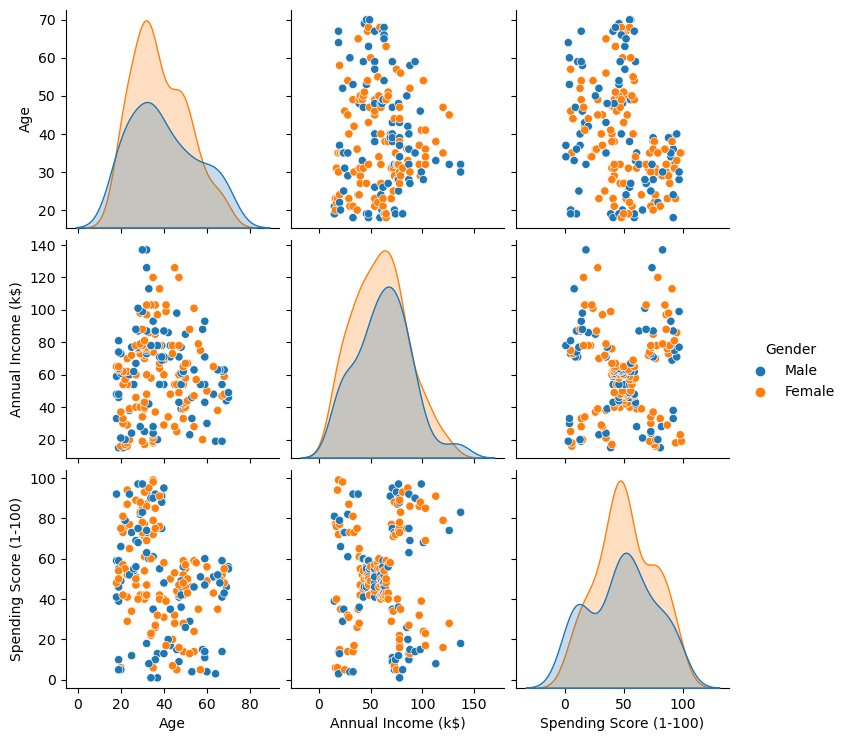

In [12]:
sns.pairplot(df, hue='Gender')

# Univariate Analysis

# 1. Gender

In [13]:
v1 = df['Gender'].value_counts()
v1

Female    112
Male       88
Name: Gender, dtype: int64

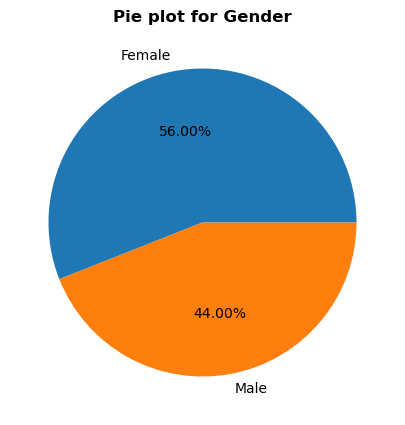

In [14]:
label = v1.index

# Pie plot for the column 'Gender'

plt.figure(figsize=(10,5))
plt.pie(v1, labels=label, autopct='%.2f%%')
plt.title('Pie plot for Gender',fontweight='bold',size=12)
plt.show()

<b>Observation:</b>

* As we can see, 56% of the customers are Female and 44% of the customers are Male.

# 2. Age

In [15]:
# Lets find out the minimum age

df.Age.min()

18

In [16]:
# Lets find out the maximum age

df.Age.max()

70

In [17]:
# Lets create a list to specify the number of bins

b1 = [18,20,30,40,50,60,70]

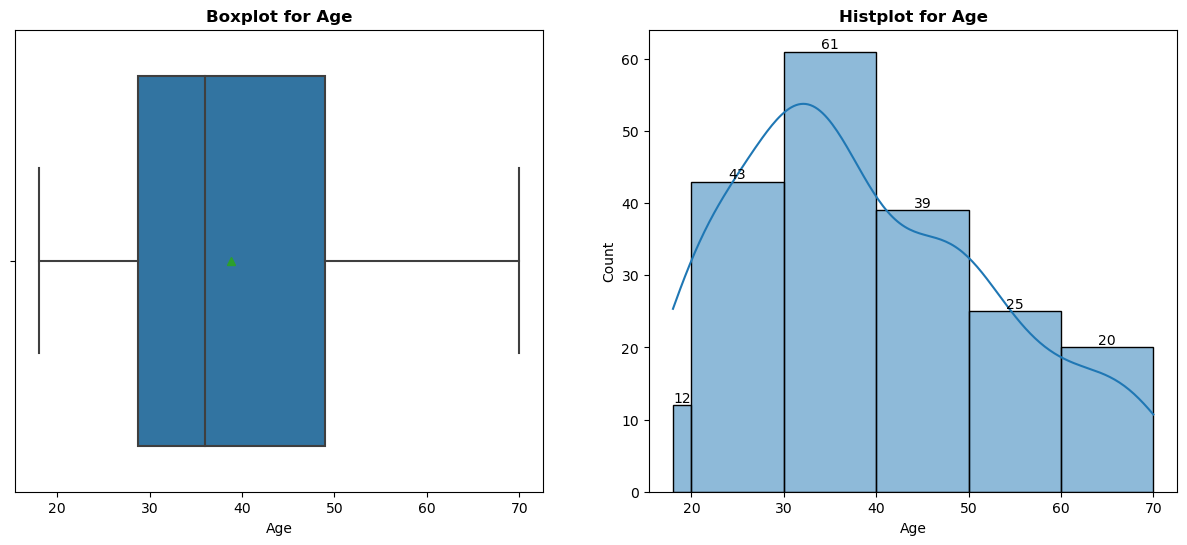

In [18]:
# Create a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


# Plot the boxplot on the left subplot
sns.boxplot(x='Age', data=df, showmeans=True, ax=ax1)
ax1.set_title('Boxplot for Age', fontweight='bold', size=12)


# Plot the histogram on the right subplot
ax = sns.histplot(data=df, x='Age', bins=b1, kde=True, ax=ax2)
for container in ax.containers:
    ax.bar_label(container)
ax2.set_title('Histplot for Age', fontweight='bold', size=12)


# Show the plot
plt.show()

In [19]:
ax = sns.histplot(data=df, x='Age', bins=b1, kde=True, ax=ax2)
for container in ax.containers:
    ax.bar_label(container)
ax2.set_title('Histplot for Age', fontweight='bold', size=12)


Text(0.5, 1.0, 'Histplot for Age')

<b>Observation:</b>

* The Mean is greater than Median so, the distribution is skewed to the right.
* No outliers are found in the given feature.
* The customers with Age group between 30-40 are more in numbers followed by age group between 20-30.

In [20]:
# Lets find out the 90th percentile and mean of the column 'Age'

q = df['Age'].quantile(0.9)
m = df['Age'].mean()

print(f'90% of the data lies before Age {q}\n')
print(f'Mean of the data lies at {m}\n')

90% of the data lies before Age 59.099999999999994

Mean of the data lies at 38.85



# 3. Annual Income (k$)

In [21]:
# Lets find out the minimum annual income

df['Annual Income (k$)'].min()

15

In [22]:
# Lets find out the maximum annual income

df['Annual Income (k$)'].max()

137

In [23]:
# Lets create a list to specify the number of bins

b2 = [15,20,40,60,80,100,120,137]

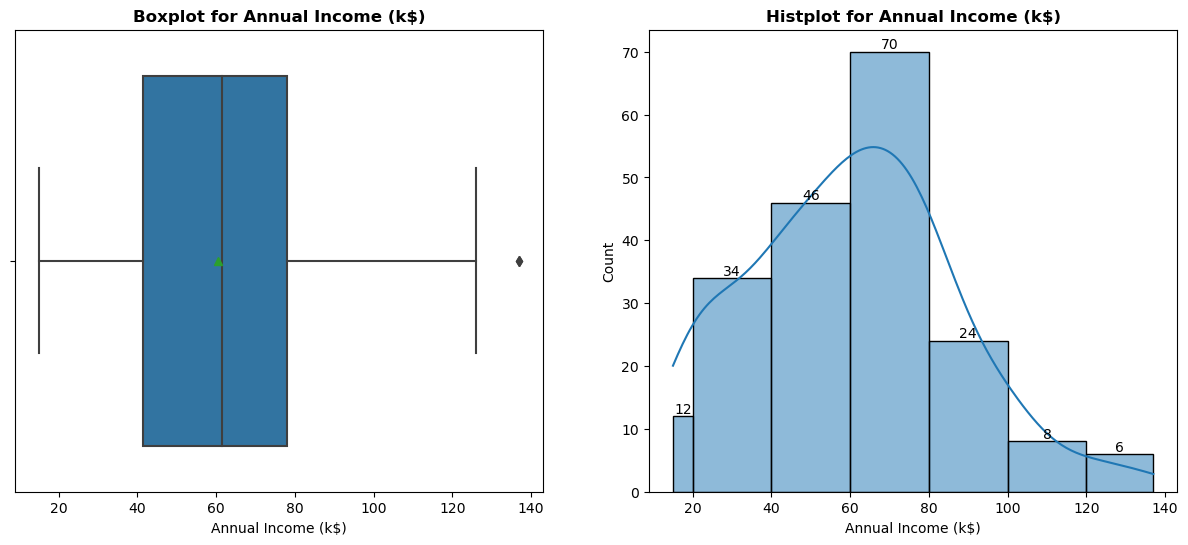

In [24]:
# Create a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


# Plot the boxplot on the left subplot
sns.boxplot(x='Annual Income (k$)', data=df, showmeans=True, ax=ax1)
ax1.set_title('Boxplot for Annual Income (k$)', fontweight='bold', size=12)


# Plot the histogram on the right subplot
ax = sns.histplot(data=df, x='Annual Income (k$)', bins=b2, kde=True, ax=ax2)
for container in ax.containers:
    ax.bar_label(container)
ax2.set_title('Histplot for Annual Income (k$)', fontweight='bold', size=12)


# Show the plot
plt.show()

<b>Observation:</b>

* The Mean is less than Median so, the distribution is skewed to the Left.
* Only 1 outlier found in the given feature.
* The customers with Annual Income (k$) between 60-80 are more in numbers followed by age group between 40-60.
* The data looks Normally distributed.

In [25]:
# Lets find out the 90th percentile and mean of the column 'Annual Income (k$)'

q1 = df['Annual Income (k$)'].quantile(0.9)
m1 = df['Annual Income (k$)'].mean()

print(f'90% of the data lies before Annual income (k$) {q1}\n')
print(f'Mean of the data lies at {m1}\n')

90% of the data lies before Annual income (k$) 93.39999999999998

Mean of the data lies at 60.56



# 4. Spending Score (1-100)

In [26]:
# Lets find out the minimum spending score

df['Spending Score (1-100)'].min()

1

In [27]:
# Lets find out the maximum spending score

df['Spending Score (1-100)'].max()

99

In [28]:
# Lets create a list to specify the number of bins

b3 = [1,10,20,30,40,50,60,70,80,90,99]

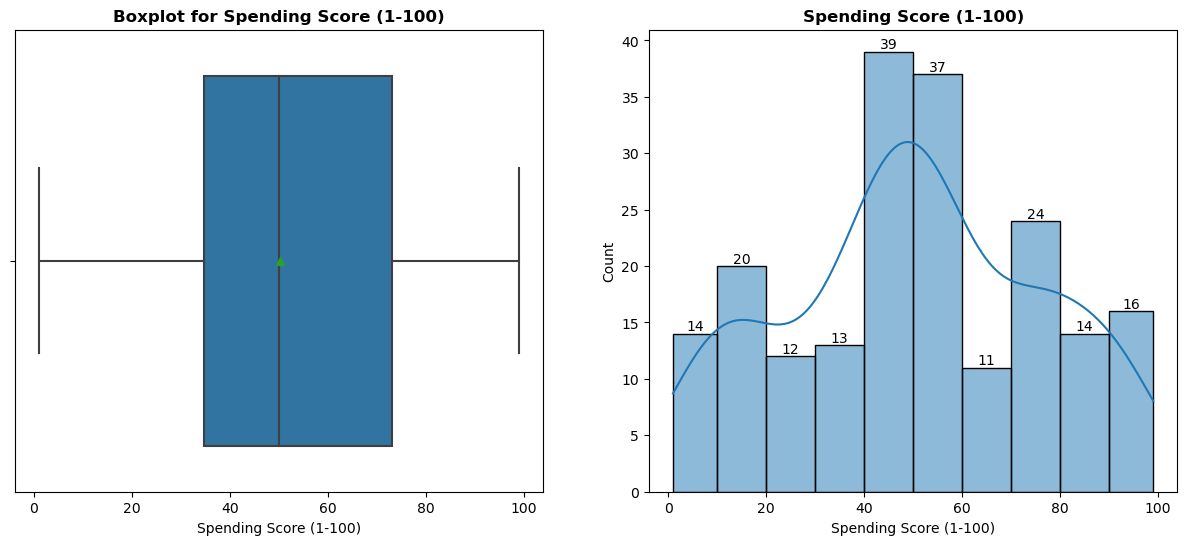

In [29]:
# Create a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


# Plot the boxplot on the left subplot
sns.boxplot(x='Spending Score (1-100)', data=df, showmeans=True, ax=ax1)
ax1.set_title('Boxplot for Spending Score (1-100)', fontweight='bold', size=12)


# Plot the histogram on the right subplot
ax = sns.histplot(data=df, x='Spending Score (1-100)', bins=b3, kde=True, ax=ax2)
for container in ax.containers:
    ax.bar_label(container)
ax2.set_title('Spending Score (1-100)', fontweight='bold', size=12)


# Show the plot
plt.show()

<b>Observation:</b>

* The Mean is Greater than Median so, the distribution is skewed to the right.
* No outliers found in the given feature.
* The customers with Spending Score (1-100) between 40-50 are more in numbers followed by age group between 50-60.
* The data is not distributed Normally.

In [30]:
# Lets find out the 90th percentile and mean of the column 'Spending Score (1-100)'

q2 = df['Spending Score (1-100)'].quantile(0.9)
m2 = df['Spending Score (1-100)'].mean()

print(f'90% of the data lies before Spending Score (1-100) {q2}\n')
print(f'Mean of the data lies at {m2}\n')

90% of the data lies before Spending Score (1-100) 87.1

Mean of the data lies at 50.2



# Bivariate Analysis

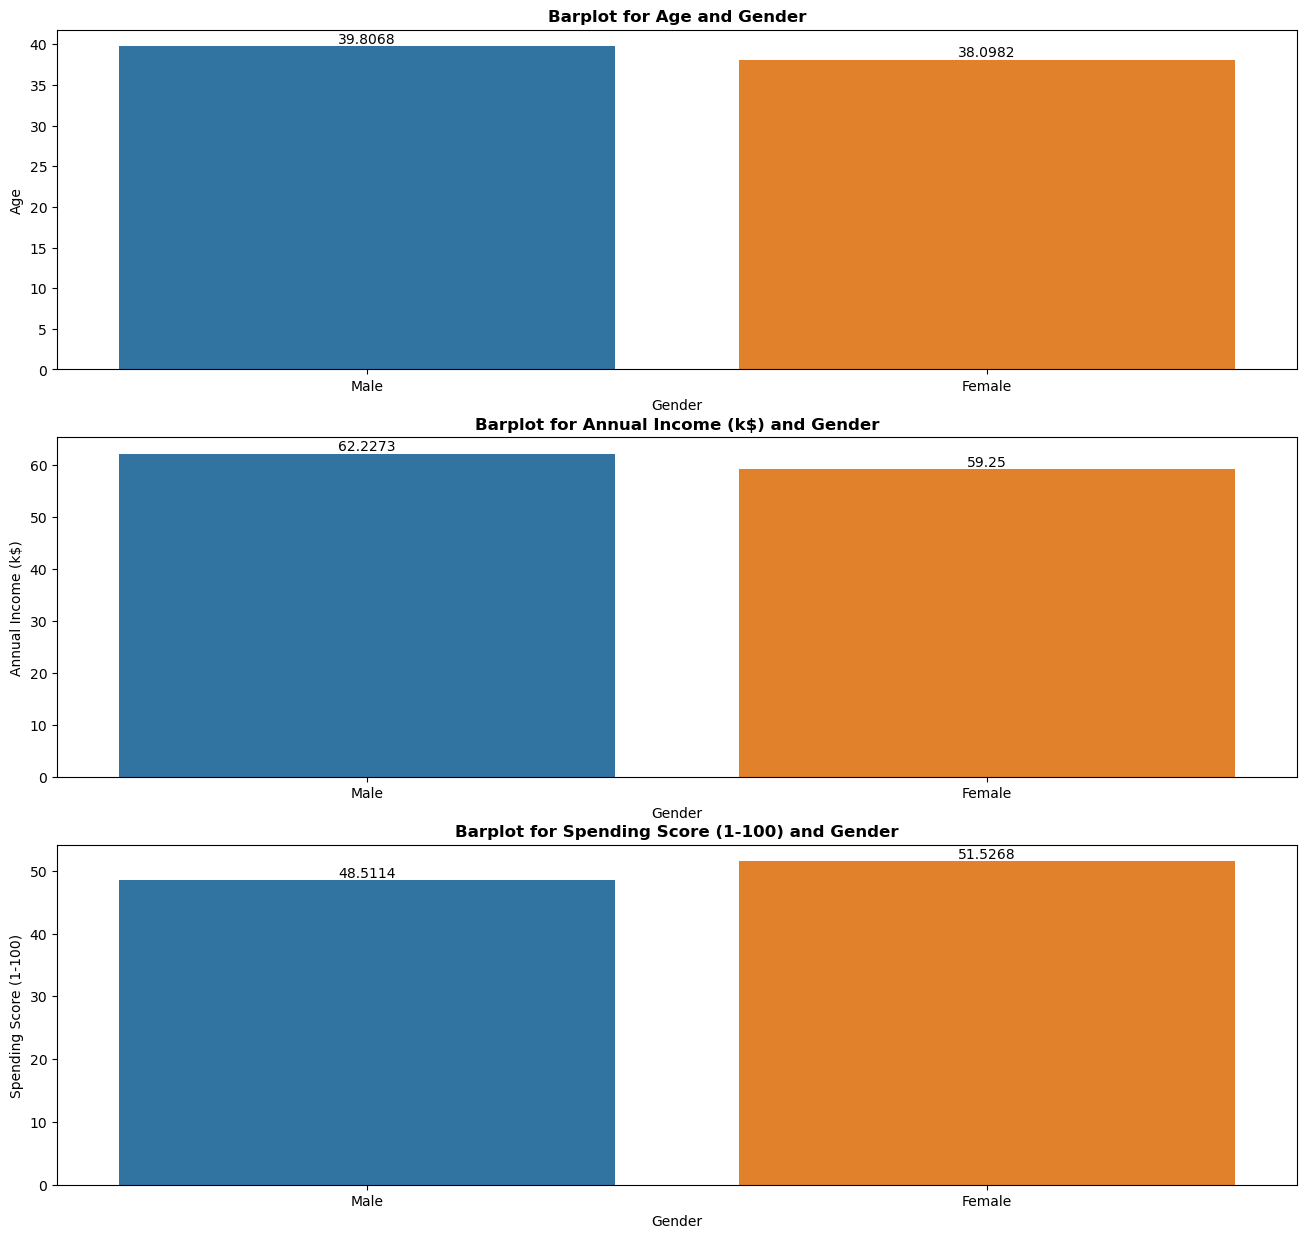

In [31]:
# Create a figure with 3 subplots
fig, (ax3, ax4, ax5) = plt.subplots(3, 1, figsize=(16, 15))


# Bar plot for 'Age' and 'Gender'
sns.barplot(data=df, y='Age', x='Gender', ci=None, ax=ax3)
for container in ax3.containers:
    ax3.bar_label(container)
ax3.set_title('Barplot for Age and Gender', fontweight='bold', size=12)


# Bar plot for 'Annual Income (k$)' and 'Gender'
sns.barplot(data=df, y='Annual Income (k$)', x='Gender', ci=None, ax=ax4)
for container in ax4.containers:
    ax4.bar_label(container)
ax4.set_title('Barplot for Annual Income (k$) and Gender', fontweight='bold', size=12)


# Bar plot for 'Spending Score (1-100)' and 'Gender'
sns.barplot(data=df, y='Spending Score (1-100)', x='Gender', ci=None, ax=ax5)
for container in ax5.containers:
    ax5.bar_label(container)
ax5.set_title('Barplot for Spending Score (1-100) and Gender', fontweight='bold', size=12)


# Show the plot
plt.show()

<b>Observation:</b>

* For the Gender of 'Male' customers the average 'Age' is more than Female customers.
* For the Male customers the Average Annual Income (K$) is more than the female customers.
* For the Female customers the average Spending score is more than the Male customers.

# Multivariate Analysis

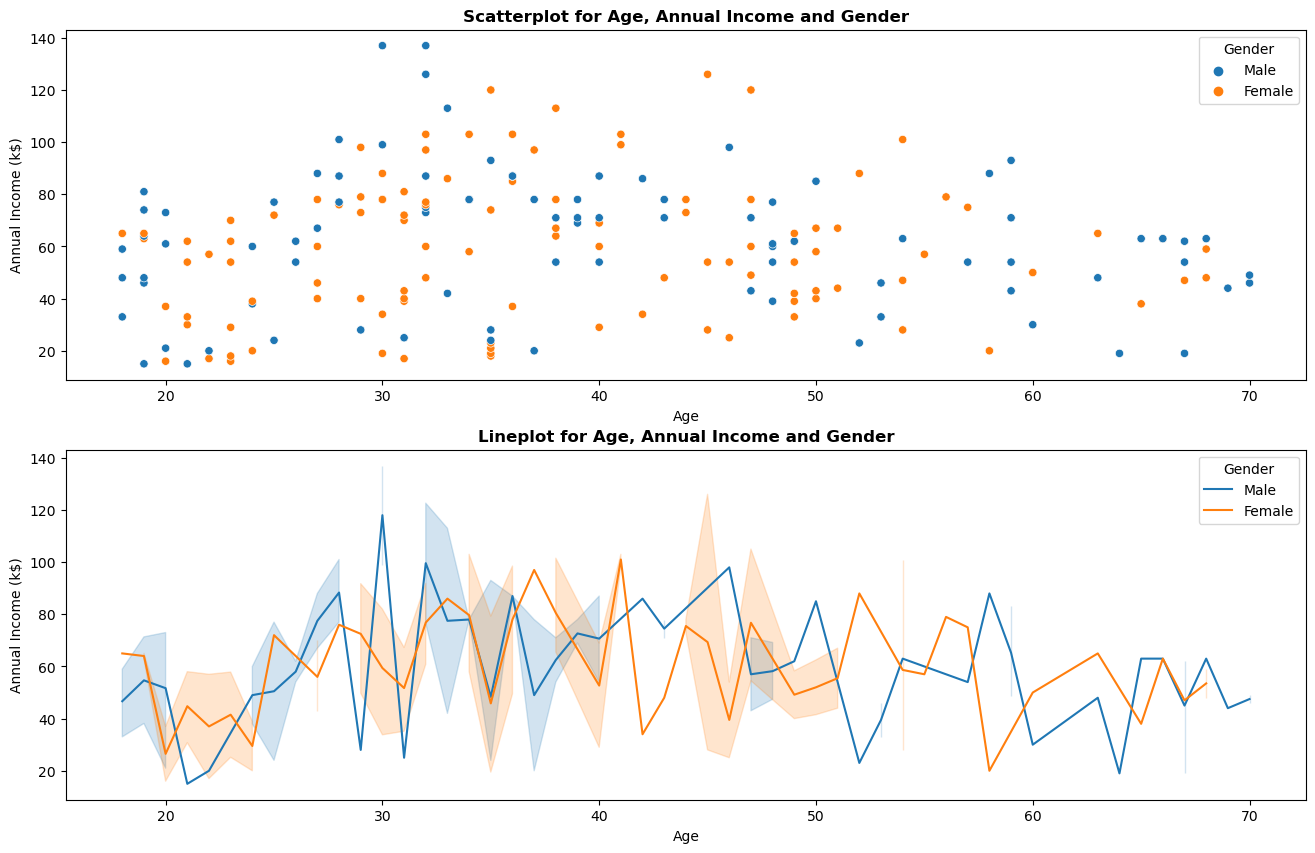

In [32]:
# Create a figure with 2 subplots
fig, (ax6, ax7) = plt.subplots(2, 1, figsize=(16, 10))


# Scatter plot for 'Age', 'Annual Income' and 'Gender'
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Gender', ax=ax6)
ax6.set_title('Scatterplot for Age, Annual Income and Gender', fontweight='bold', size=12)


# Line plot for 'Age', 'Annual Income' and 'Gender'
sns.lineplot(data=df, x='Age', y='Annual Income (k$)', hue='Gender', ax=ax7)
ax7.set_title('Lineplot for Age, Annual Income and Gender', fontweight='bold', size=12)


# Show the plot
plt.show()

<b>Observation:</b>

* The Annual Income of Male Customers of Age 30 is around 120k dollars.
* The Annual Income of Female Customers of Age 41 is around 100k dollars.

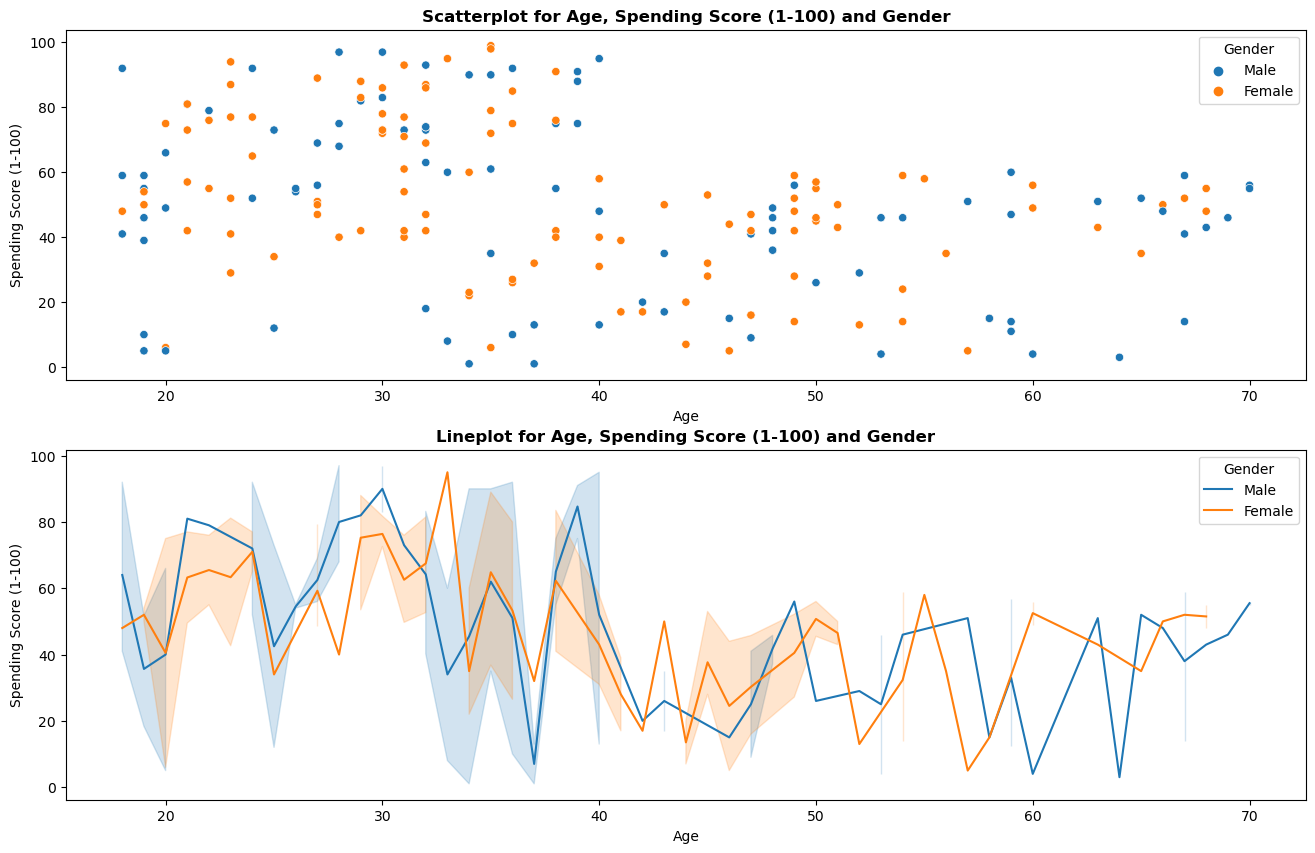

In [33]:
# Create a figure with 2 subplots
fig, (ax6, ax7) = plt.subplots(2, 1, figsize=(16, 10))


# Scatter plot for 'Age', 'Spending Score (1-100)' and 'Gender'
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender', ax=ax6)
ax6.set_title('Scatterplot for Age, Spending Score (1-100) and Gender', fontweight='bold', size=12)


# Line plot for 'Age', 'Spending Score (1-100)' and 'Gender'
sns.lineplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender', ax=ax7)
ax7.set_title('Lineplot for Age, Spending Score (1-100) and Gender', fontweight='bold', size=12)


# Show the plot
plt.show()

<b>Observation:</b>
    
* The Spending Score of Male Customers of Age 30 is around 90.
* The Spending Score of Female Customers of Age 34 is around 95.

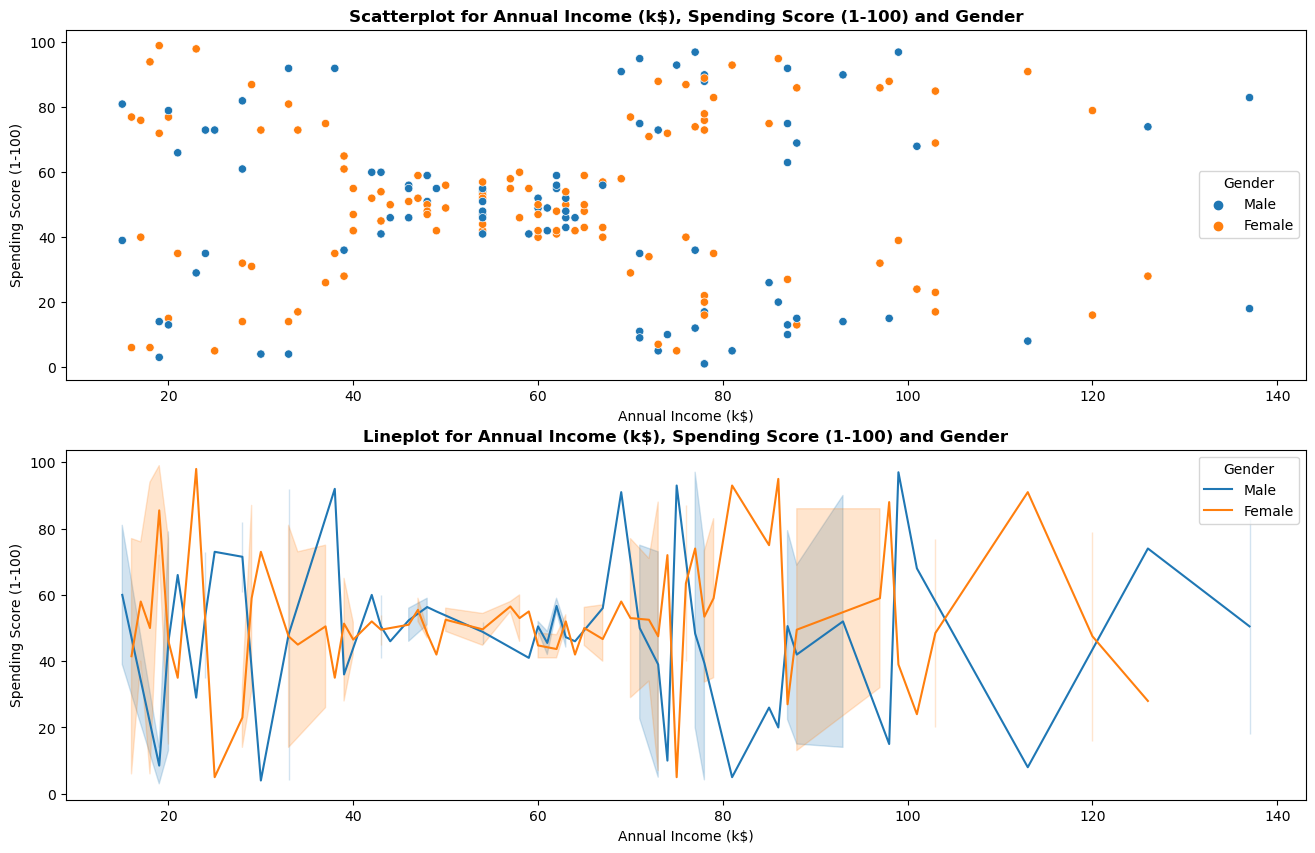

In [34]:
# Create a figure with 2 subplots
fig, (ax8, ax9) = plt.subplots(2, 1, figsize=(16, 10))


# Scatter plot for 'Annual Income (k$)', 'Spending Score (1-100)' and 'Gender'
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', ax=ax8)
ax8.set_title('Scatterplot for Annual Income (k$), Spending Score (1-100) and Gender', fontweight='bold', size=12)


# Line plot for 'Annual Income (k$)', 'Spending Score (1-100)' and 'Gender'
sns.lineplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', ax=ax9)
ax9.set_title('Lineplot for Annual Income (k$), Spending Score (1-100) and Gender', fontweight='bold', size=12)


# Show the plot
plt.show()

<b>Observation:</b>

* The Spending Score of Male Customers with an Annual Income of 100k dollars is around 95.
* The Spending Score of Female Customers with an Annual Income of 23k dollars  is around 98.

# Data Preprocessing

In [35]:
# Lets convert the column 'Gender' to a categorical data type

df['Gender'] = df['Gender'].astype('category')

In [36]:
# Checking for info after converting the column 'Gender' to a categorical data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  200 non-null    category
 1   Age                     200 non-null    int64   
 2   Annual Income (k$)      200 non-null    int64   
 3   Spending Score (1-100)  200 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 5.1 KB


In [37]:
# Lets now convert the column 'Gender from categorical to numerical

from sklearn.preprocessing import LabelEncoder 

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [38]:
# Checking for info after converting the column 'Gender' to a numerical data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int32
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 5.6 KB


# Data Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerics = ['int16','int32','int64']
new_df = df.select_dtypes(include=numerics)
scaled_df = pd.DataFrame(scaler.fit_transform(new_df.to_numpy()),columns=new_df.columns)
scaled_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [40]:
#Lets find the correlation

v = scaled_df.corr()
v

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


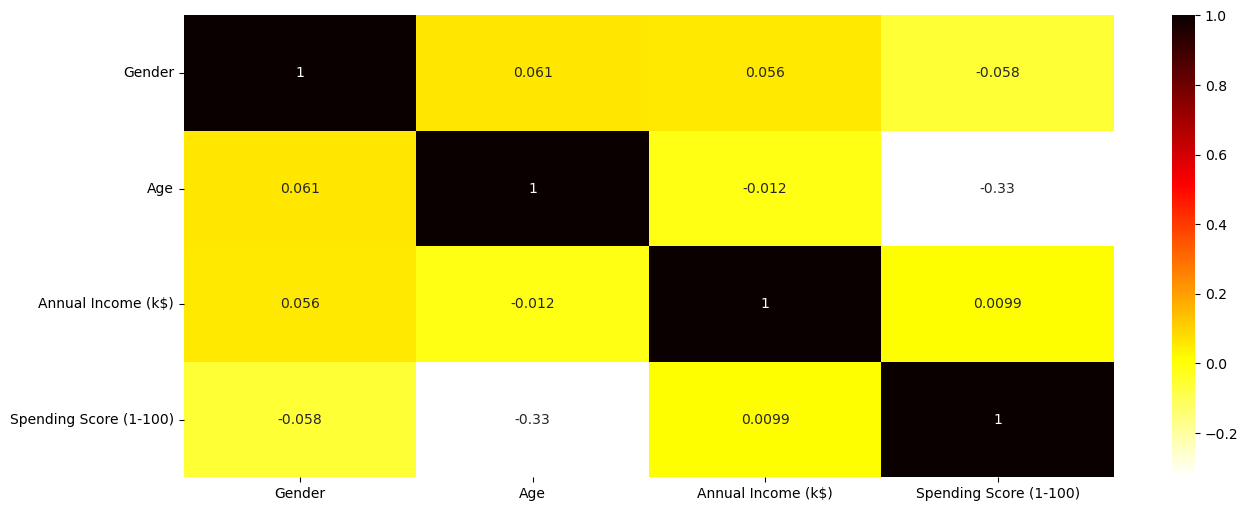

In [41]:
# Lets plot the heatmap

plt.figure(figsize=(15,6))
sns.heatmap(v,annot=True,cmap='hot_r')
plt.show()

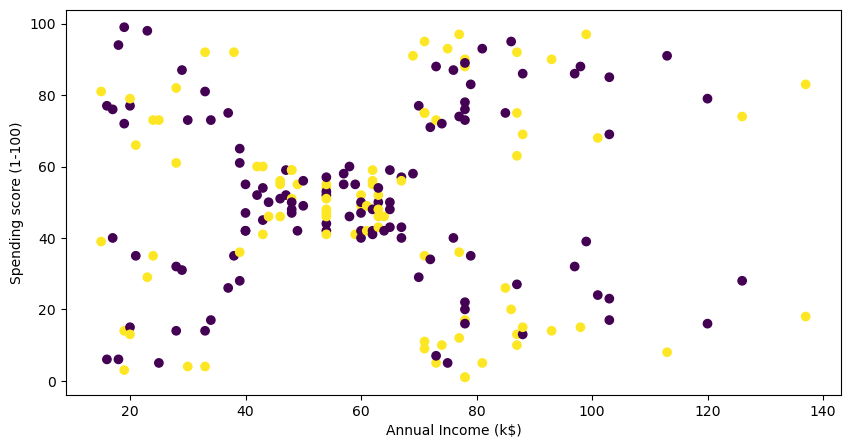

In [42]:
# Scatter plot for pca data

plt.figure(figsize=(10,5))
plt.scatter(df.iloc[:,2],df.iloc[:,3],c=df['Gender'])

plt.ylabel('Spending score (1-100)')
plt.xlabel('Annual Income (k$)')

plt.show()

<b>As we can see, there is no proper formation of clusters.</b>

# Model Building

# 1. K-Means Clustering

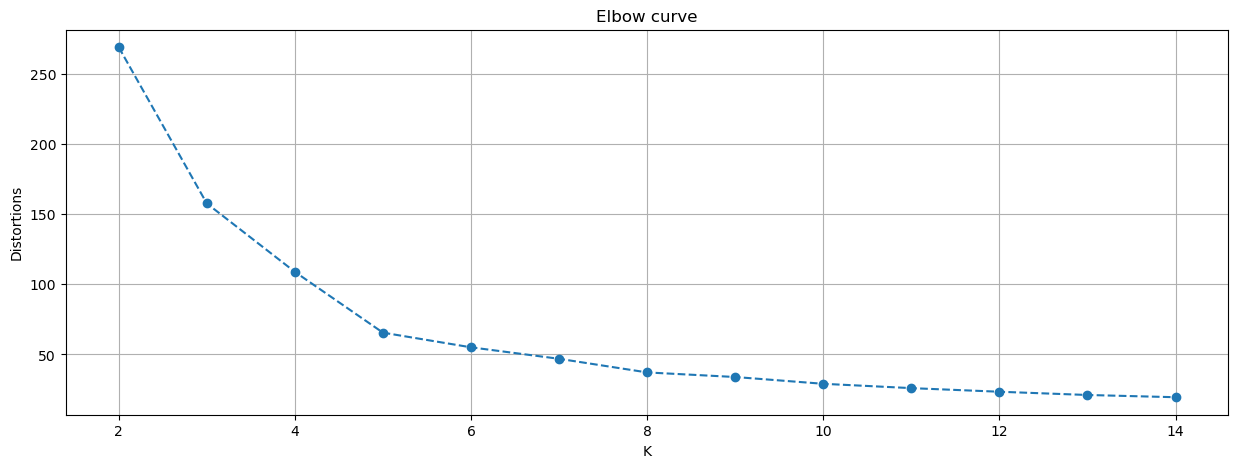

In [43]:
# Lets find the optimum k values

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

distortions = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k,init='k-means++',max_iter=300,n_init=10)
    kmeans.fit(scaled_df.iloc[:,2:])
    distortions.append(kmeans.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 15), distortions,'o--')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distortions')
plt.title('Elbow curve')
plt.show()

<b> As we can see from the elbow curve, the optimum value of k is 5.</b>

<b>Lets cross-check for the optimum value of k by calculating the Silhouette Score</b>

In [44]:
from sklearn.metrics import silhouette_score

In [45]:
# Lets create a NumPy array with values from 2 to 10

clusters_range = np.arange(2,10)

In [46]:
# Lets perform KMeans clustering for each value in the clusters_range array 
# and compute the silhouette score for the resulting clusters


for cluster in clusters_range:
    kmeans = KMeans(n_clusters=cluster,init='k-means++',max_iter=300,n_init=10)
    kmeans.fit_predict(scaled_df.iloc[:,2:])
    score = silhouette_score(scaled_df.iloc[:,2:], kmeans.labels_, metric='euclidean')
    print(f'for cluster: {cluster} --> Silhouette Score: %.3f' % score)

for cluster: 2 --> Silhouette Score: 0.312
for cluster: 3 --> Silhouette Score: 0.467
for cluster: 4 --> Silhouette Score: 0.494
for cluster: 5 --> Silhouette Score: 0.555
for cluster: 6 --> Silhouette Score: 0.540
for cluster: 7 --> Silhouette Score: 0.528
for cluster: 8 --> Silhouette Score: 0.455
for cluster: 9 --> Silhouette Score: 0.455


* The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to 
other clusters (separation).
* The silhouette score of 1 means that the clusters are very dense and nicely separated.

<b>Lets consider k=5 based on Elbow Curve and Silhouttee Score.</b>

In [47]:
# Lets initialize a KMeans clustering model with 5 clusters (n_clusters=5) 
# and fit it to the data stored in df using the fit() method


model = KMeans(n_clusters=5)
model.fit(df)

KMeans(n_clusters=5)

In [48]:
labels = model.fit_predict(scaled_df.iloc[:,2:])
labels

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

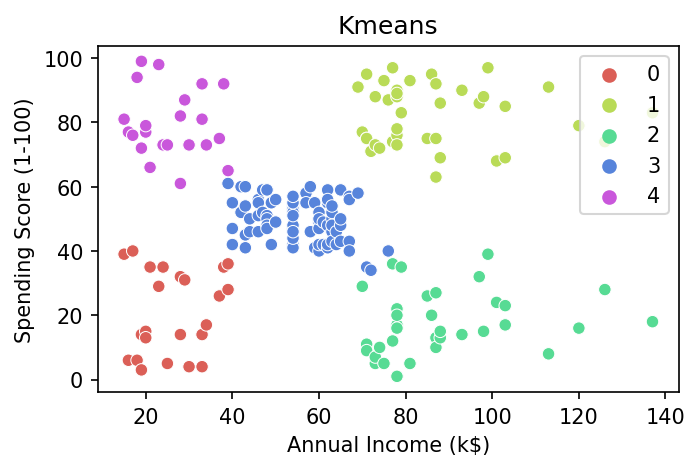

In [49]:
plt.figure(figsize=(5,3),dpi=150)
sns.scatterplot(x=df.iloc[:,2],y=df.iloc[:,3],hue=labels,palette=sns.color_palette('hls', np.unique(labels).shape[0]))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('Kmeans')
plt.show()

<b>Observation:</b>

* The formaion of clusters is proper but some of the datapoints of one cluster are close to another cluster.
* We cannot find ouliers using kmeans.

# 2. DBSCAN Clustering

In [50]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=6)
nbrs = neigh.fit(scaled_df.iloc[:,2:])
distances, indices = nbrs.kneighbors(scaled_df.iloc[:,2:])

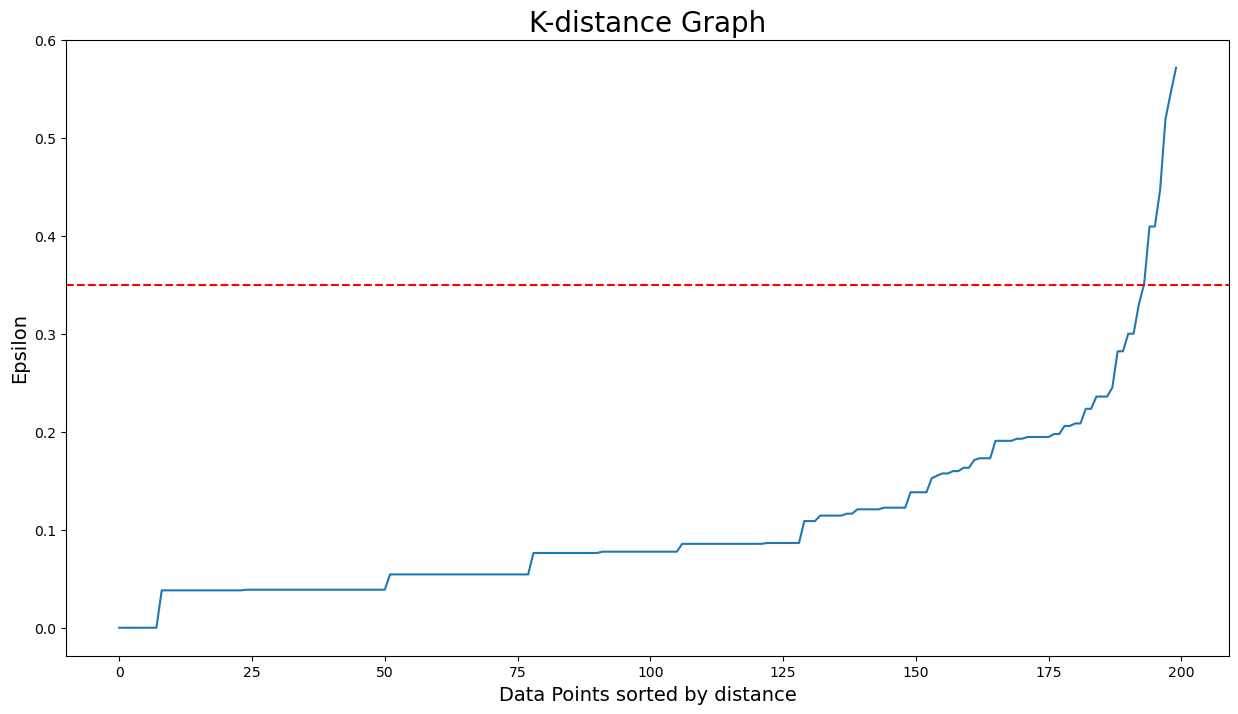

In [51]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=0.35, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [52]:
# Hyper Parameter Tuning

eps = 0.45
for min_samples in range(1, 25):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = model.fit_predict(scaled_df.iloc[:, 2:])
    x = cluster_labels + 2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii, y[ii]))
    print('eps=', eps, '| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 0.45 | min_samples=  1 | obtained clustering:  [(2, 157), (3, 34), (4, 2), (5, 2), (6, 2), (7, 1), (8, 1), (9, 1)]
eps= 0.45 | min_samples=  2 | obtained clustering:  [(1, 3), (2, 157), (3, 34), (4, 2), (5, 2), (6, 2)]
eps= 0.45 | min_samples=  3 | obtained clustering:  [(1, 9), (2, 157), (3, 34)]
eps= 0.45 | min_samples=  4 | obtained clustering:  [(1, 9), (2, 157), (3, 34)]
eps= 0.45 | min_samples=  5 | obtained clustering:  [(1, 11), (2, 144), (3, 11), (4, 34)]
eps= 0.45 | min_samples=  6 | obtained clustering:  [(1, 14), (2, 143), (3, 11), (4, 32)]
eps= 0.45 | min_samples=  7 | obtained clustering:  [(1, 16), (2, 12), (3, 140), (4, 32)]
eps= 0.45 | min_samples=  8 | obtained clustering:  [(1, 19), (2, 137), (3, 12), (4, 32)]
eps= 0.45 | min_samples=  9 | obtained clustering:  [(1, 24), (2, 16), (3, 12), (4, 95), (5, 30), (6, 23)]
eps= 0.45 | min_samples=  10 | obtained clustering:  [(1, 29), (2, 16), (3, 10), (4, 92), (5, 30), (6, 23)]
eps= 0.45 | min_samples=  11 | obtained c

In [53]:
model = DBSCAN(eps=0.45,min_samples=8)
model.fit(scaled_df.iloc[:,2:])

DBSCAN(eps=0.45, min_samples=8)

In [54]:
scaled_df['dbscan_label1']=model.labels_
scaled_df['dbscan_label1'].value_counts()

 0    137
 2     32
-1     19
 1     12
Name: dbscan_label1, dtype: int64

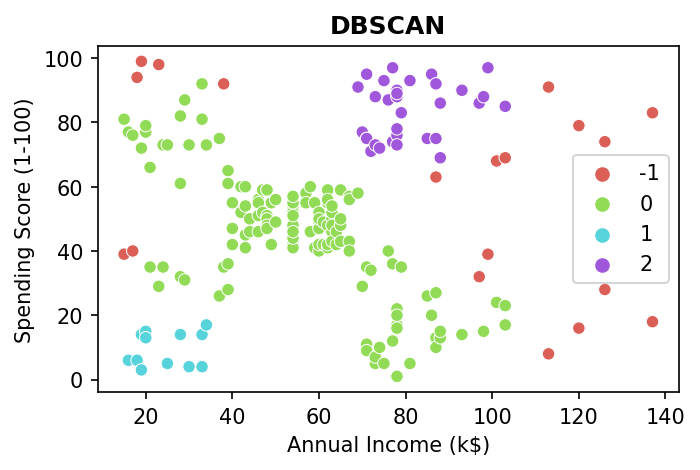

In [55]:
plt.figure(figsize=(5,3),dpi=150)
sns.scatterplot(x=df.iloc[:,2],y=df.iloc[:,3],hue=model.labels_,palette=sns.color_palette('hls', np.unique(model.labels_).shape[0]))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('DBSCAN',fontweight='bold',size=12)
plt.show()

<b>Observation:</b>

* The formation of clusters are not proper and cluster points are nearer to another cluster.
* The outliers can be detected which are in red dots in these DBSCAN clustering.

# 3. Agglomerative Clustering

In [56]:
import scipy.cluster.hierarchy as sch

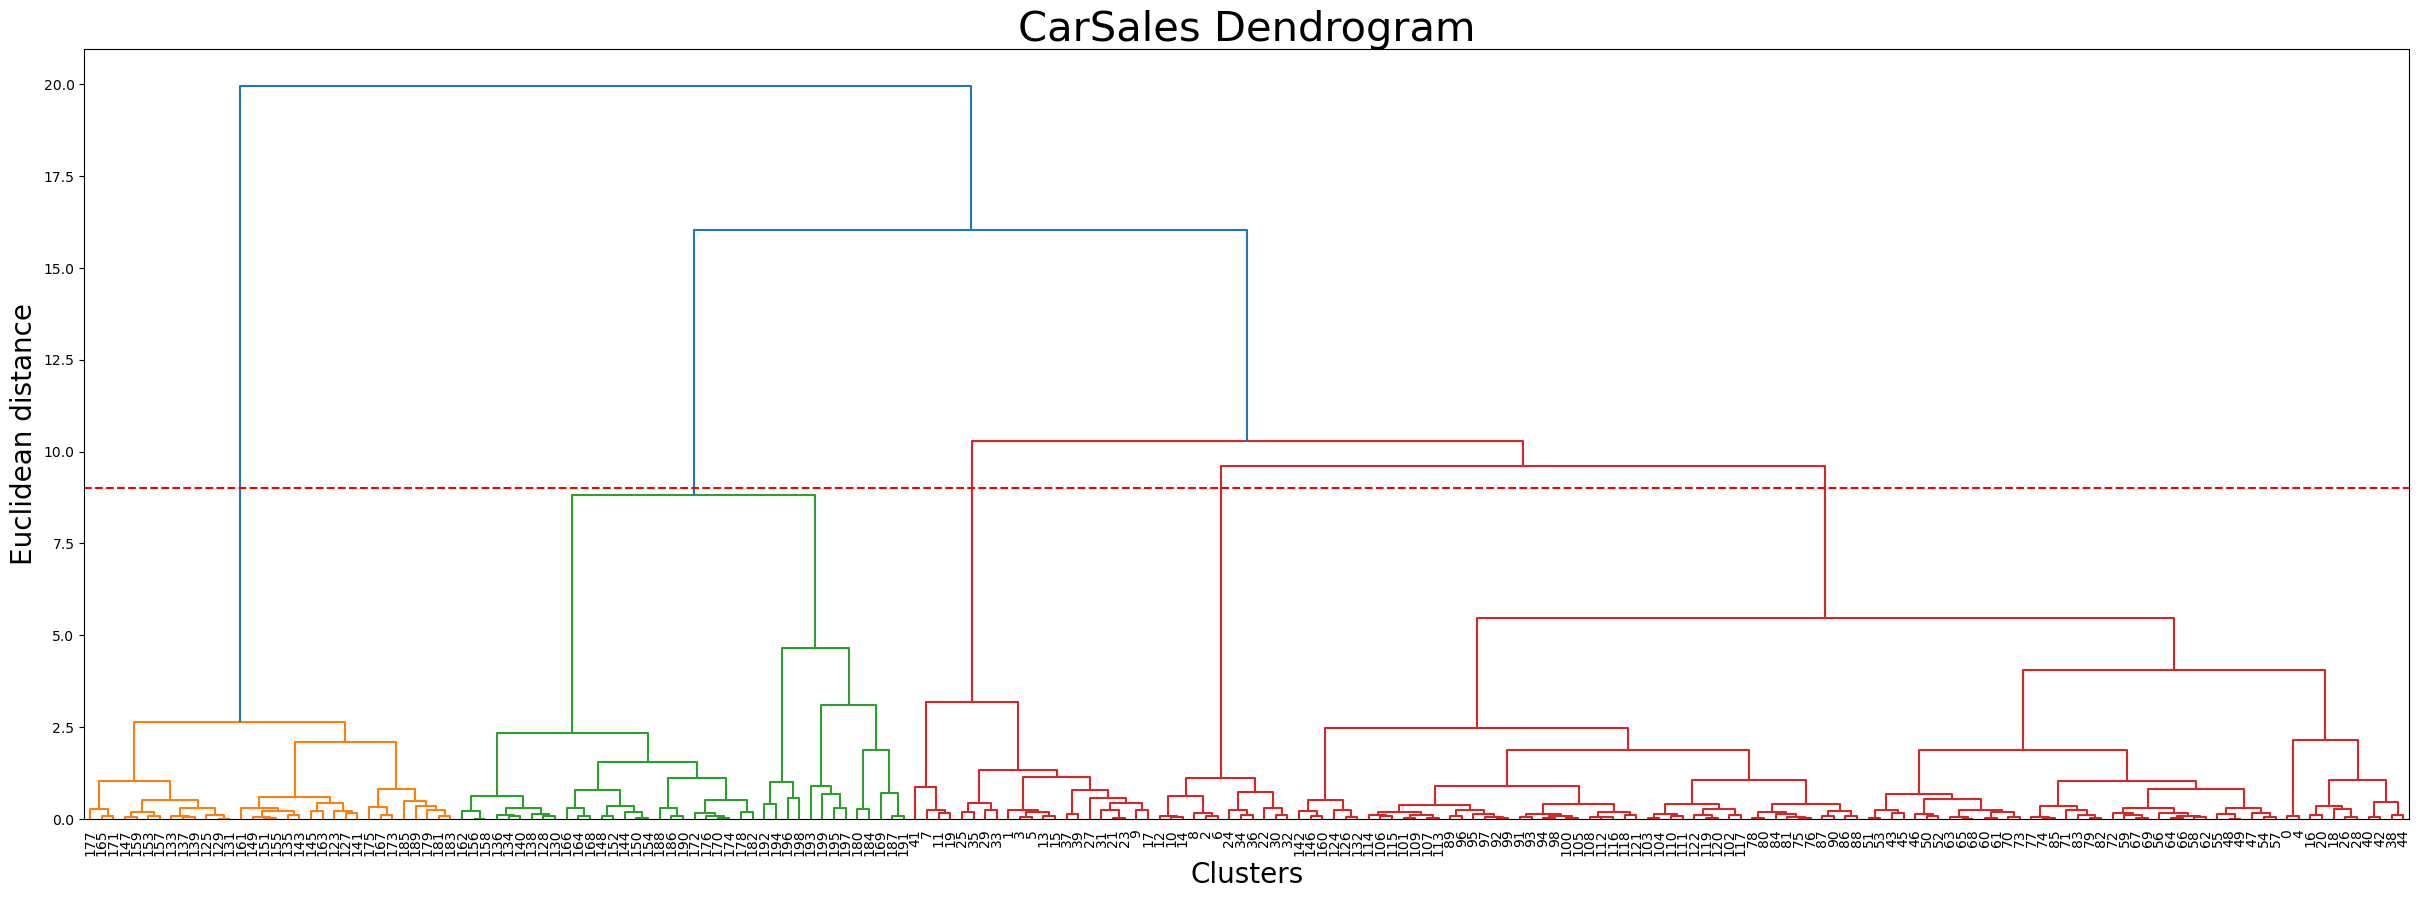

In [57]:
# Plotting dendogram

plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(scaled_df.iloc[:,2:], method = 'ward'))
plt.axhline(y=9.0, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('CarSales Dendrogram',fontsize=30)
plt.xlabel('Clusters',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [58]:
# Model building

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(scaled_df.iloc[:,2:])
y_hc

array([2, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 2, 1, 2, 1,
       4, 1, 4, 1, 2, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 0, 3, 0, 3,
       2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

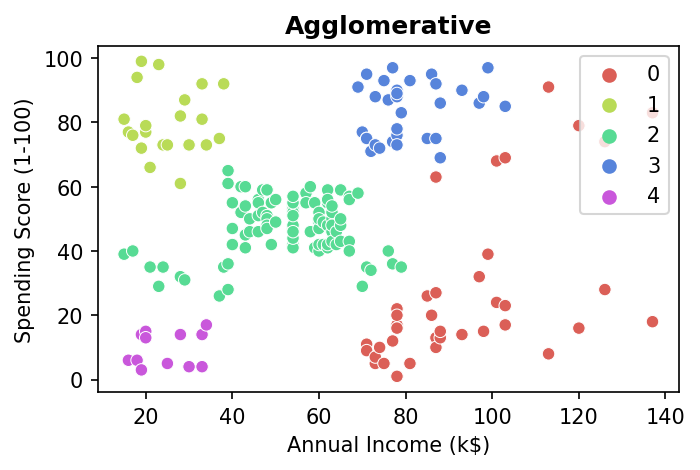

In [59]:
plt.figure(figsize=(5,3),dpi=150)
sns.scatterplot(x=df.iloc[:,2],y=df.iloc[:,3],hue=y_hc,palette=sns.color_palette('hls', np.unique(y_hc).shape[0]))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('Agglomerative',fontweight='bold',size=12)
plt.show()

<b>Observation:</b>

* The formaion of clusters is proper but some of the datapoints of one cluster are close to another cluster.
* We cannot find outliers using Agglomerative clustering.

# K-Means clustering algorithm is the best clustering algorithm for our dataset to segment customers into different groups.

# Customer Segmentation based on the Annual Income (k$) and Spending Score(1-100) as per KMeans Clustering Algorithm :

In [60]:
df['cluster'] = labels

In [61]:
for cluster in df.cluster.unique():
    if cluster == 2 : name = 'High Income but Less Spending Scores Customers!'
    elif cluster == 1 : name = 'Low Income but High Spending Scores Customers!'
    elif cluster == 3 : name = 'Average Income and Average Spending Scores Customers!'
    elif cluster == 0 : name = 'High Income and High Spending Scores Customers. Can be Target for Sales!'
    elif cluster == 4 : name = 'Low Income and Low Spending Scores Customers!'
    a = df[df.cluster == cluster]['Spending Score (1-100)']
    print(f'{name} :\n {a.unique()}\n')

High Income and High Spending Scores Customers. Can be Target for Sales! :
 [39  6 40  3 14 15 13 35 29  5 32 31  4 17 26 36 28]

Low Income and Low Spending Scores Customers! :
 [81 77 76 94 72 99 79 66 98 73 82 61 87 92 75 65]

Average Income and Average Spending Scores Customers! :
 [61 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49 53 44 57 58 40 43 35 34]

Low Income but High Spending Scores Customers! :
 [91 77 95 75 71 88 73 72 93 87 97 74 90 76 89 78 83 63 92 86 69 68 85 79]

High Income but Less Spending Scores Customers! :
 [29 11  9  5  7 10 12 36 22 17 20 16  1 35 26 27 13 15 14 32 39 24 23  8
 28 18]



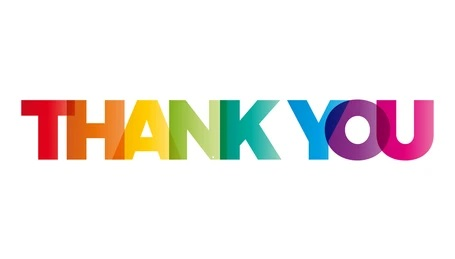